In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

In [2]:
N = 2048
FOV = 10e-3
dx = FOV/N

E0 = 9000

beam_params = {
    'photonEnergy': E0+0.,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'rangeFactor': 5,
    'scaleFactor': 20,
    'z_source': 630
}

In [3]:
b1 = beam.Beam(beam_params=beam_params)

alphaAsym = 7.7*np.pi/180
im0 = optics.PPM('im0', z=789.9, FOV=2e-3, N=256)

crystal1 = optics.Crystal('c1', hkl=[1,1,1], length=1e-2, width=20e-3, z=790, E0=E0,
                          alphaAsym=0, orientation=0,pol='p')

# should be orientation 0
crystal2 = optics.Crystal('c2', hkl=[1,1,1], length=1e-2, width=20e-3, z=790.1, E0=E0,alphaAsym=alphaAsym, 
                          orientation=2,pol='p')
print(crystal2.alpha*180/np.pi)
print(crystal2.beta0*180/np.pi)

im1 = optics.PPM('im1', z=790.15,N=256,FOV=2e-3)

m1 = optics.CurvedMirror('m1', z=790.2, p=10, q=1, alpha=3e-3, length=0.1, orientation=0)
crl1 = optics.CRL('c1', z=790.2, roc=2.45e-6)
focus = optics.PPM('focus', z=791.2, FOV=120e-6, N=256)
slit1 = optics.Slit('s1', z=791.200001, x_width=10e-6, y_width=2e-3)
m2 = optics.CurvedMirror('m2', z=792.2, p=1, q=1e4, alpha=3e-3, length=.1, orientation=2)
crl2 = optics.CRL('c2', z=790.8, roc=2.524e-6)

crystal3 = optics.Crystal('c3', hkl=[1,1,1], length=1e-2, width=20e-3, z=792.3, E0=E0,alphaAsym=0, orientation=2,
                         asym_type='emergence',pol='p')
# should be orientation 0
crystal4 = optics.Crystal('c4', hkl=[1,1,1], length=1e-2, width=20e-3, z=792.4, E0=E0,alphaAsym=-alphaAsym, 
                          asym_type='emergence', orientation=0,pol='p')

im2 = optics.PPM('im2', z=792.5, FOV=2e-3, N=256)

# devices = [mr1l0,mr2l0,upstream_YAG]
# devices = [im0,crystal1,crystal2,im1, crl1, focus, crl2, crystal3, crystal4, im2]
devices = [im0,crystal1,crystal2,im1, m1, focus]
# devices = devices + crl_list

mono_beamline = beamline.Beamline(devices)

FWHM in x: 17.70000033623029 microns
FWHM in y: 17.70000033623029 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.130423486709137
5.130423486709137
x is focused
y is focused
b 1.00
b 4.00
20.391319986069636
4.995667149144264
b 1.00
b 0.25
after c1: 0.44
after c2: -0.00
after m1: 0.01


FWHM in x: 551.9400955834155 microns
FWHM in y: 551.9400955834155 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130423486709137
5.130423486709137
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.36e-01
zRy: 1.18e+01
zx: 10.000691
zy: 160.110686
azimuth -0.05 mrad
drift3
delta z: 0.00
zx: 10.050691
zy: 160.160686
azimuth -0.05 mrad
im1
zx: 10.050691
zy: 160.160686
azimuth -0.05 mrad
drift4
delta z: -0.00
zx: 10.100691
zy: 160.210686
azimuth -0.05 mrad
m1
0.0
zRx: 7.20e-03
zRy: 1.18e+01
zx: -0.999004
zy: 160.210686
azimuth 5.95 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.001014
zy: 161.210704
azimuth 5.95 mrad
focus
zx: 0.001014
zy: 161.210704
azimuth 5.95 mrad


/Users/Matt/beamline/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<IPython.core.display.Javascript object>


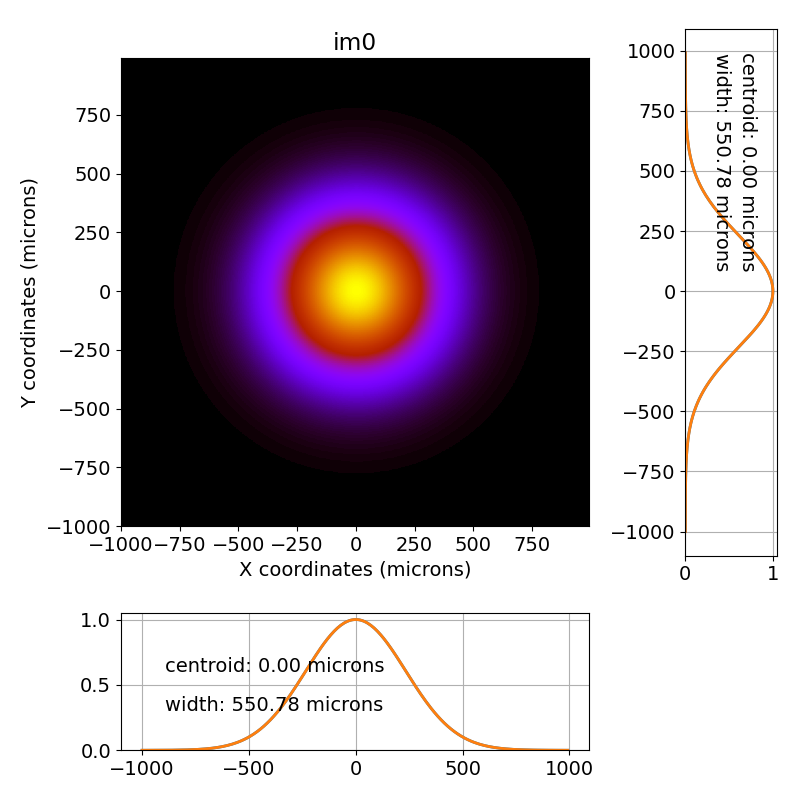

<IPython.core.display.Javascript object>


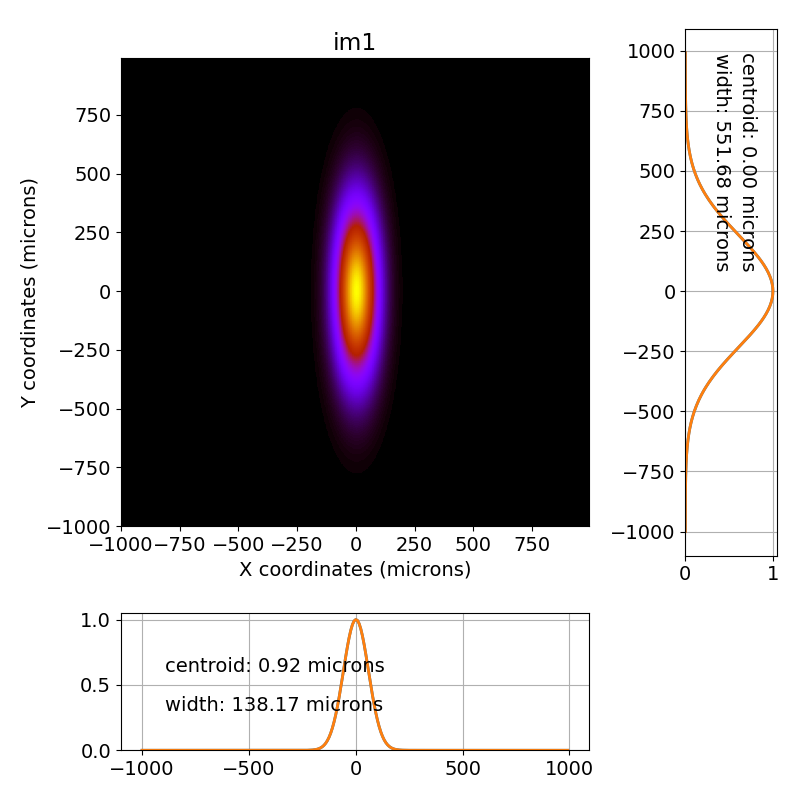

<IPython.core.display.Javascript object>


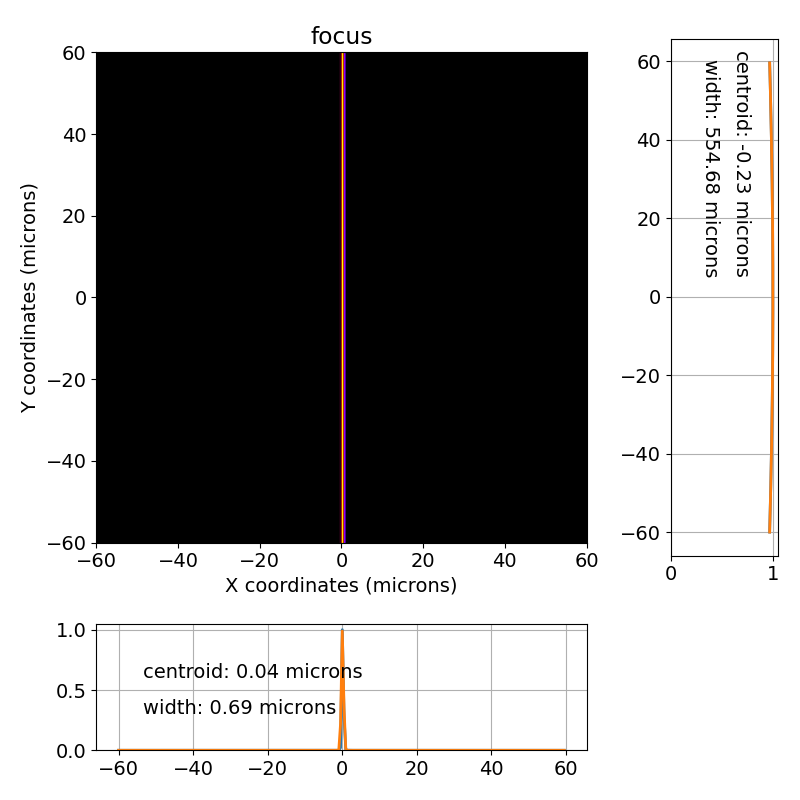

In [4]:
b2 = mono_beamline.propagate_beamline(b1)
mono_beamline.im0.view_beam()
mono_beamline.im1.view_beam()
mono_beamline.focus.view_beam()
# mono_beamline.im2.view_beam()

In [52]:
beam_params['photonEnergy'] = 9000

pulse_test = beam.Pulse(beam_params=beam_params, tau=4, time_window=500)

In [53]:
pulse_test.propagate(beamline=mono_beamline, screen_names=['focus'])

FWHM in x: 552.0113210935242 microns
FWHM in y: 552.0113210935242 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129760831569117
5.129760831569117
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.34e-01
zRy: 1.18e+01
zx: 9.980709
zy: 160.110686
azimuth 0.03 mrad
drift3
delta z: -0.00
zx: 10.030709
zy: 160.160686
azimuth 0.03 mrad
im1
zx: 10.030709
zy: 160.160686
azimuth 0.03 mrad
drift4
delta z: 5826.05
zx: 10.083709
zy: 160.213686
azimuth 0.03 mrad
m1
3089.6397495669044
zRx: 6.89e-03
zRy: 1.18e+01
zx: -0.964607
zy: 160.213686
azimuth 5.87 mrad
drift5
delta z: -5827.07
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.032411
zy: 161.210703
azimuth 5.87 mrad
focus
zx: 0.032411
zy: 161.210703
azimuth 5.87 mr

/Users/Matt/beamline/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.34e-01
zRy: 1.18e+01
zx: 9.981280
zy: 160.110686
azimuth 0.03 mrad
drift3
delta z: -0.00
zx: 10.031280
zy: 160.160686
azimuth 0.03 mrad
im1
zx: 10.031280
zy: 160.160686
azimuth 0.03 mrad
drift4
delta z: -22.05
zx: 10.084191
zy: 160.213597
azimuth 0.03 mrad
m1
2996.168971264051
zRx: 6.90e-03
zRy: 1.18e+01
zx: -0.965591
zy: 160.213597
azimuth 5.87 mrad
drift5
delta z: 22.05
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.031514
zy: 161.210703
azimuth 5.87 mrad
focus
zx: 0.031514
zy: 161.210703
azimuth 5.87 mrad
FWHM in x: 552.0087770082798 microns
FWHM in y: 552.0087770082798 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129784497824118
5.129784497824118
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zR

zx: 10.032422
zy: 160.160686
azimuth 0.03 mrad
drift4
delta z: -21.97
zx: 10.085157
zy: 160.213421
azimuth 0.03 mrad
m1
2810.1825203634585
zRx: 6.92e-03
zRy: 1.18e+01
zx: -0.967560
zy: 160.213421
azimuth 5.87 mrad
drift5
delta z: 21.98
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.029722
zy: 161.210703
azimuth 5.87 mrad
focus
zx: 0.029722
zy: 161.210703
azimuth 5.87 mrad
FWHM in x: 552.0047065207403 microns
FWHM in y: 552.0047065207403 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129822363832119
5.129822363832119
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.34e-01
zRy: 1.18e+01
zx: 9.982565
zy: 160.110686
azimuth 0.02 mrad
drift3
delta z: -0.00
zx: 10.032565
zy

zRx: 7.34e-01
zRy: 1.18e+01
zx: 9.983707
zy: 160.110686
azimuth 0.02 mrad
drift3
delta z: -0.00
zx: 10.033707
zy: 160.160686
azimuth 0.02 mrad
im1
zx: 10.033707
zy: 160.160686
azimuth 0.02 mrad
drift4
delta z: -21.89
zx: 10.086245
zy: 160.213224
azimuth 0.02 mrad
m1
2602.459608766359
zRx: 6.94e-03
zRy: 1.18e+01
zx: -0.969774
zy: 160.213224
azimuth 5.88 mrad
drift5
delta z: 21.89
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.027705
zy: 161.210703
azimuth 5.88 mrad
focus
zx: 0.027705
zy: 161.210703
azimuth 5.88 mrad
FWHM in x: 552.0001272941246 microns
FWHM in y: 552.0001272941246 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129864963091121
5.129864963091121
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zR

delta z: -0.00
zx: 10.034991
zy: 160.160686
azimuth 0.01 mrad
im1
zx: 10.034991
zy: 160.160686
azimuth 0.01 mrad
drift4
delta z: -21.80
zx: 10.087333
zy: 160.213028
azimuth 0.01 mrad
m1
2396.324019190425
zRx: 6.96e-03
zRy: 1.18e+01
zx: -0.971988
zy: 160.213028
azimuth 5.88 mrad
drift5
delta z: 21.80
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.025688
zy: 161.210703
azimuth 5.88 mrad
focus
zx: 0.025688
zy: 161.210703
azimuth 5.88 mrad
FWHM in x: 551.9955481436007 microns
FWHM in y: 551.9955481436007 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129907562350122
5.129907562350122
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.34e-01
zRy: 1.18e+01
zx: 9.985134
zy: 160.110686
azimuth 0.01 mrad
drift3
de

zRx: 7.34e-01
zRy: 1.18e+01
zx: 9.986276
zy: 160.110686
azimuth 0.01 mrad
drift3
delta z: -0.00
zx: 10.036276
zy: 160.160686
azimuth 0.01 mrad
im1
zx: 10.036276
zy: 160.160686
azimuth 0.01 mrad
drift4
delta z: -21.72
zx: 10.088422
zy: 160.212832
azimuth 0.01 mrad
m1
2191.7619192382595
zRx: 6.98e-03
zRy: 1.18e+01
zx: -0.974201
zy: 160.212832
azimuth 5.89 mrad
drift5
delta z: 21.72
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.023671
zy: 161.210703
azimuth 5.89 mrad
focus
zx: 0.023671
zy: 161.210703
azimuth 5.89 mrad
FWHM in x: 551.9909690691666 microns
FWHM in y: 551.9909690691666 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129950161609123
5.129950161609123
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
z

zRx: 7.35e-01
zRy: 1.18e+01
zx: 9.987560
zy: 160.110686
azimuth 0.00 mrad
drift3
delta z: -0.00
zx: 10.037560
zy: 160.160686
azimuth 0.00 mrad
im1
zx: 10.037560
zy: 160.160686
azimuth 0.00 mrad
drift4
delta z: -21.63
zx: 10.089511
zy: 160.212637
azimuth 0.00 mrad
m1
1988.7596196255108
zRx: 7.00e-03
zRy: 1.18e+01
zx: -0.976414
zy: 160.212637
azimuth 5.89 mrad
drift5
delta z: 21.63
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.021653
zy: 161.210703
azimuth 5.89 mrad
focus
zx: 0.021653
zy: 161.210703
azimuth 5.89 mrad
FWHM in x: 551.9863900708206 microns
FWHM in y: 551.9863900708206 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129992760868125
5.129992760868125
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
z

FWHM in x: 551.9823199139435 microns
FWHM in y: 551.9823199139435 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130030626876125
5.130030626876125
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.35e-01
zRy: 1.18e+01
zx: 9.988845
zy: 160.110686
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 10.038845
zy: 160.160686
azimuth -0.00 mrad
im1
zx: 10.038845
zy: 160.160686
azimuth -0.00 mrad
drift4
delta z: -21.55
zx: 10.090602
zy: 160.212443
azimuth -0.00 mrad
m1
1787.3035725689263
zRx: 7.02e-03
zRy: 1.18e+01
zx: -0.978626
zy: 160.212443
azimuth 5.90 mrad
drift5
delta z: 21.55
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.019635
zy: 161.210703
azimuth 5.90 mrad
focus
zx: 0.01

zRx: 7.04e-03
zRy: 1.18e+01
zx: -0.980837
zy: 160.212249
azimuth 5.90 mrad
drift5
delta z: 21.47
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.017617
zy: 161.210703
azimuth 5.90 mrad
focus
zx: 0.017617
zy: 161.210703
azimuth 5.90 mrad
FWHM in x: 551.9772323023849 microns
FWHM in y: 551.9772323023849 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130077959386127
5.130077959386127
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.35e-01
zRy: 1.18e+01
zx: 9.990272
zy: 160.110686
azimuth -0.01 mrad
drift3
delta z: 0.00
zx: 10.040272
zy: 160.160686
azimuth -0.01 mrad
im1
zx: 10.040272
zy: 160.160686
azimuth -0.01 mrad
drift4
delta z: -21.45
zx: 10.091814
zy: 160.212228
azimuth -0.01 mrad
m1
1565.260722933236

zRx: 7.35e-01
zRy: 1.18e+01
zx: 9.991557
zy: 160.110686
azimuth -0.01 mrad
drift3
delta z: 0.00
zx: 10.041557
zy: 160.160686
azimuth -0.01 mrad
im1
zx: 10.041557
zy: 160.160686
azimuth -0.01 mrad
drift4
delta z: -21.37
zx: 10.092906
zy: 160.212035
azimuth -0.01 mrad
m1
1367.0251229180785
zRx: 7.06e-03
zRy: 1.18e+01
zx: -0.983294
zy: 160.212035
azimuth 5.91 mrad
drift5
delta z: 21.37
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.015374
zy: 161.210704
azimuth 5.91 mrad
focus
zx: 0.015374
zy: 161.210704
azimuth 5.91 mrad
FWHM in x: 551.9721447847552 microns
FWHM in y: 551.9721447847552 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130125291896128
5.130125291896128
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c

zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.35e-01
zRy: 1.18e+01
zx: 9.992984
zy: 160.110686
azimuth -0.02 mrad
drift3
delta z: 0.00
zx: 10.042984
zy: 160.160686
azimuth -0.02 mrad
im1
zx: 10.042984
zy: 160.160686
azimuth -0.02 mrad
drift4
delta z: -21.28
zx: 10.094120
zy: 160.211822
azimuth -0.02 mrad
m1
1148.5278911175167
zRx: 7.08e-03
zRy: 1.18e+01
zx: -0.985750
zy: 160.211822
azimuth 5.92 mrad
drift5
delta z: 21.28
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.013131
zy: 161.210704
azimuth 5.92 mrad
focus
zx: 0.013131
zy: 161.210704
azimuth 5.92 mrad
FWHM in x: 551.9670573610517 microns
FWHM in y: 551.9670573610517 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130172624406129
5.130172624406129
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.0

zRx: 7.35e-01
zRy: 1.18e+01
zx: 9.994269
zy: 160.110686
azimuth -0.03 mrad
drift3
delta z: 0.00
zx: 10.044269
zy: 160.160686
azimuth -0.03 mrad
im1
zx: 10.044269
zy: 160.160686
azimuth -0.03 mrad
drift4
delta z: -21.20
zx: 10.095213
zy: 160.211631
azimuth -0.03 mrad
m1
953.4542687918287
zRx: 7.10e-03
zRy: 1.18e+01
zx: -0.987961
zy: 160.211631
azimuth 5.92 mrad
drift5
delta z: 21.20
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.011112
zy: 161.210704
azimuth 5.92 mrad
focus
zx: 0.011112
zy: 161.210704
azimuth 5.92 mrad
FWHM in x: 551.9624787600233 microns
FWHM in y: 551.9624787600233 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130215223665132
5.130215223665132
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
z

im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.35e-01
zRy: 1.18e+01
zx: 9.995553
zy: 160.110686
azimuth -0.03 mrad
drift3
delta z: 0.00
zx: 10.045553
zy: 160.160686
azimuth -0.03 mrad
im1
zx: 10.045553
zy: 160.160686
azimuth -0.03 mrad
drift4
delta z: -21.12
zx: 10.096307
zy: 160.211440
azimuth -0.03 mrad
m1
759.8583809246715
zRx: 7.12e-03
zRy: 1.18e+01
zx: -0.990170
zy: 160.211440
azimuth 5.93 mrad
drift5
delta z: 21.12
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.009093
zy: 161.210704
azimuth 5.93 mrad
focus
zx: 0.009093
zy: 161.210704
azimuth 5.93 mrad
FWHM in x: 551.9579002350712 microns
FWHM in y: 551.9579002350712 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad

zx: 0.007298
zy: 161.210704
azimuth 5.93 mrad
FWHM in x: 551.9538304989787 microns
FWHM in y: 551.9538304989787 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130295688932133
5.130295688932133
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.35e-01
zRy: 1.18e+01
zx: 9.996837
zy: 160.110686
azimuth -0.04 mrad
drift3
delta z: 0.00
zx: 10.046837
zy: 160.160686
azimuth -0.04 mrad
im1
zx: 10.046837
zy: 160.160686
azimuth -0.04 mrad
drift4
delta z: -21.03
zx: 10.097402
zy: 160.211251
azimuth -0.04 mrad
m1
567.7275221230533
zRx: 7.14e-03
zRy: 1.18e+01
zx: -0.992379
zy: 160.211251
azimuth 5.93 mrad
drift5
delta z: 21.04
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.007074
zy: 161.210704
azimuth 5.93 mrad
focus

x remains focused
y stays unfocused
zx: 0.005278
zy: 161.210704
azimuth 5.93 mrad
focus
zx: 0.005278
zy: 161.210704
azimuth 5.93 mrad
FWHM in x: 551.9492521177208 microns
FWHM in y: 551.9492521177208 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130338288191136
5.130338288191136
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.35e-01
zRy: 1.18e+01
zx: 9.998122
zy: 160.110686
azimuth -0.04 mrad
drift3
delta z: 0.00
zx: 10.048122
zy: 160.160686
azimuth -0.04 mrad
im1
zx: 10.048122
zy: 160.160686
azimuth -0.04 mrad
drift4
delta z: -20.95
zx: 10.098497
zy: 160.211062
azimuth -0.04 mrad
m1
377.04911644565874
zRx: 7.16e-03
zRy: 1.18e+01
zx: -0.994588
zy: 160.211062
azimuth 5.94 mrad
drift5
delta z: 20.96
x becomes focused
y stays unfocuse

zx: 10.099472
zy: 160.210894
azimuth -0.05 mrad
m1
208.766477858788
zRx: 7.17e-03
zRy: 1.18e+01
zx: -0.996551
zy: 160.210894
azimuth 5.94 mrad
drift5
delta z: 20.89
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.003258
zy: 161.210704
azimuth 5.94 mrad
focus
zx: 0.003258
zy: 161.210704
azimuth 5.94 mrad
FWHM in x: 551.9446738125338 microns
FWHM in y: 551.9446738125338 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130380887450136
5.130380887450136
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.35e-01
zRy: 1.18e+01
zx: 9.999406
zy: 160.110686
azimuth -0.05 mrad
drift3
delta z: 0.00
zx: 10.049406
zy: 160.160686
azimuth -0.05 mrad
im1
zx: 10.049406
zy: 160.160686
azimuth -0.05 mrad
drift4
delta z: -20.87


zx: 10.100569
zy: 160.210707
azimuth -0.05 mrad
m1
20.797734706160846
zRx: 7.19e-03
zRy: 1.18e+01
zx: -0.998759
zy: 160.210707
azimuth 5.94 mrad
drift5
delta z: 20.81
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.001238
zy: 161.210704
azimuth 5.94 mrad
focus
zx: 0.001238
zy: 161.210704
azimuth 5.94 mrad
FWHM in x: 551.9400955834157 microns
FWHM in y: 551.9400955834157 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130423486709137
5.130423486709137
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.36e-01
zRy: 1.18e+01
zx: 10.000691
zy: 160.110686
azimuth -0.05 mrad
drift3
delta z: 0.00
zx: 10.050691
zy: 160.160686
azimuth -0.05 mrad
im1
zx: 10.050691
zy: 160.160686
azi

im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.36e-01
zRy: 1.18e+01
zx: 10.001832
zy: 160.110686
azimuth -0.06 mrad
drift3
delta z: 0.00
zx: 10.051832
zy: 160.160686
azimuth -0.06 mrad
im1
zx: 10.051832
zy: 160.160686
azimuth -0.06 mrad
drift4
delta z: -20.72
zx: 10.101666
zy: 160.210520
azimuth -0.06 mrad
m1
-165.75417160008948
zRx: 7.21e-03
zRy: 1.18e+01
zx: -1.000966
zy: 160.210520
azimuth 5.95 mrad
drift5
delta z: 20.73
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.000783
zy: 161.210704
azimuth 5.95 mrad
focus
zx: -0.000783
zy: 161.210704
azimuth 5.95 mrad
FWHM in x: 551.9355174303644 microns
FWHM in y: 551.9355174303644 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.1304660859681395
5.130466085

-330.3984186512413
zRx: 7.23e-03
zRy: 1.18e+01
zx: -1.002928
zy: 160.210355
azimuth 5.95 mrad
drift5
delta z: 20.66
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.002579
zy: 161.210704
azimuth 5.95 mrad
focus
zx: -0.002579
zy: 161.210704
azimuth 5.95 mrad
FWHM in x: 551.9314480248426 microns
FWHM in y: 551.9314480248426 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.13050395197614
5.13050395197614
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.36e-01
zRy: 1.18e+01
zx: 10.003117
zy: 160.110686
azimuth -0.07 mrad
drift3
delta z: 0.00
zx: 10.053117
zy: 160.160686
azimuth -0.07 mrad
im1
zx: 10.053117
zy: 160.160686
azimuth -0.07 mrad
drift4
delta z: -20.64
zx: 10.10276

zRx: 7.36e-01
zRy: 1.18e+01
zx: 10.004258
zy: 160.110686
azimuth -0.07 mrad
drift3
delta z: 0.00
zx: 10.054258
zy: 160.160686
azimuth -0.07 mrad
im1
zx: 10.054258
zy: 160.160686
azimuth -0.07 mrad
drift4
delta z: -20.57
zx: 10.103741
zy: 160.210169
azimuth -0.07 mrad
m1
-514.30695528017
zRx: 7.25e-03
zRy: 1.18e+01
zx: -1.005135
zy: 160.210169
azimuth 5.96 mrad
drift5
delta z: 20.58
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.004600
zy: 161.210704
azimuth 5.96 mrad
focus
zx: -0.004600
zy: 161.210704
azimuth 5.96 mrad
FWHM in x: 551.9268700154684 microns
FWHM in y: 551.9268700154684 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.13054655123514
5.13054655123514
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2

zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.36e-01
zRy: 1.18e+01
zx: 10.005542
zy: 160.110686
azimuth -0.08 mrad
drift3
delta z: 0.00
zx: 10.055542
zy: 160.160686
azimuth -0.08 mrad
im1
zx: 10.055542
zy: 160.160686
azimuth -0.08 mrad
drift4
delta z: -20.50
zx: 10.104841
zy: 160.209984
azimuth -0.08 mrad
m1
-696.833239085136
zRx: 7.27e-03
zRy: 1.18e+01
zx: -1.007341
zy: 160.209984
azimuth 5.96 mrad
drift5
delta z: 20.50
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.006621
zy: 161.210704
azimuth 5.96 mrad
focus
zx: -0.006621
zy: 161.210704
azimuth 5.96 mrad
FWHM in x: 551.9222920821553 microns
FWHM in y: 551.9222920821553 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130589150494142
5.130589150494142
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000

zx: 10.056684
zy: 160.160686
azimuth -0.08 mrad
im1
zx: 10.056684
zy: 160.160686
azimuth -0.08 mrad
drift4
delta z: -20.43
zx: 10.105819
zy: 160.209821
azimuth -0.08 mrad
m1
-857.9279062027462
zRx: 7.29e-03
zRy: 1.18e+01
zx: -1.009301
zy: 160.209821
azimuth 5.97 mrad
drift5
delta z: 20.43
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.008418
zy: 161.210704
azimuth 5.97 mrad
focus
zx: -0.008418
zy: 161.210704
azimuth 5.97 mrad
FWHM in x: 551.9182228719519 microns
FWHM in y: 551.9182228719519 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130627016502143
5.130627016502143
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.36e-01
zRy: 1.18e+01
zx: 10.006827
zy: 160.110686

zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.36e-01
zRy: 1.18e+01
zx: 10.007968
zy: 160.110686
azimuth -0.09 mrad
drift3
delta z: 0.00
zx: 10.057968
zy: 160.160686
azimuth -0.09 mrad
im1
zx: 10.057968
zy: 160.160686
azimuth -0.09 mrad
drift4
delta z: -20.35
zx: 10.106919
zy: 160.209637
azimuth -0.09 mrad
m1
-1037.8751964620437
zRx: 7.31e-03
zRy: 1.18e+01
zx: -1.011507
zy: 160.209637
azimuth 5.97 mrad
drift5
delta z: 20.35
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.010440
zy: 161.210704
azimuth 5.97 mrad
focus
zx: -0.010440
zy: 161.210704
azimuth 5.97 mrad
FWHM in x: 551.9136450823054 microns
FWHM in y: 551.9136450823054 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130669615761144
5.130669615761144
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mr

zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.36e-01
zRy: 1.18e+01
zx: 10.009252
zy: 160.110686
azimuth -0.09 mrad
drift3
delta z: 0.00
zx: 10.059252
zy: 160.160686
azimuth -0.09 mrad
im1
zx: 10.059252
zy: 160.160686
azimuth -0.09 mrad
drift4
delta z: -20.27
zx: 10.108021
zy: 160.209454
azimuth -0.09 mrad
m1
-1216.4738205115684
zRx: 7.33e-03
zRy: 1.18e+01
zx: -1.013712
zy: 160.209454
azimuth 5.98 mrad
drift5
delta z: 20.28
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.012462
zy: 161.210704
azimuth 5.98 mrad
focus
zx: -0.012462
zy: 161.210704
azimuth 5.98 mrad
FWHM in x: 551.9090673687149 microns
FWHM in y: 551.9090673687149 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.1307122150201465
5.1307122150201465
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160

zRx: 7.36e-01
zRy: 1.18e+01
zx: 10.010537
zy: 160.110686
azimuth -0.10 mrad
drift3
delta z: 0.00
zx: 10.060537
zy: 160.160686
azimuth -0.10 mrad
im1
zx: 10.060537
zy: 160.160686
azimuth -0.10 mrad
drift4
delta z: -20.20
zx: 10.109123
zy: 160.209272
azimuth -0.10 mrad
m1
-1393.735178298439
zRx: 7.35e-03
zRy: 1.18e+01
zx: -1.015916
zy: 160.209272
azimuth 5.98 mrad
drift5
delta z: 20.20
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.014485
zy: 161.210704
azimuth 5.98 mrad
focus
zx: -0.014485
zy: 161.210704
azimuth 5.98 mrad
FWHM in x: 551.9044897311785 microns
FWHM in y: 551.9044897311785 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130754814279148
5.130754814279148
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.1106

zRx: 7.36e-01
zRy: 1.18e+01
zx: 10.011821
zy: 160.110686
azimuth -0.10 mrad
drift3
delta z: 0.00
zx: 10.061821
zy: 160.160686
azimuth -0.10 mrad
im1
zx: 10.061821
zy: 160.160686
azimuth -0.10 mrad
drift4
delta z: -20.12
zx: 10.110226
zy: 160.209091
azimuth -0.10 mrad
m1
-1569.670555551329
zRx: 7.37e-03
zRy: 1.18e+01
zx: -1.018120
zy: 160.209091
azimuth 5.99 mrad
drift5
delta z: 20.12
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.016507
zy: 161.210704
azimuth 5.99 mrad
focus
zx: -0.016507
zy: 161.210704
azimuth 5.99 mrad
FWHM in x: 551.8999121696944 microns
FWHM in y: 551.8999121696944 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.13079741353815
5.13079741353815
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad


zx: 10.063105
zy: 160.160686
azimuth -0.11 mrad
im1
zx: 10.063105
zy: 160.160686
azimuth -0.11 mrad
drift4
delta z: -20.05
zx: 10.111329
zy: 160.208910
azimuth -0.11 mrad
m1
-1744.291125271821
zRx: 7.39e-03
zRy: 1.18e+01
zx: -1.020324
zy: 160.208910
azimuth 5.99 mrad
drift5
delta z: 20.05
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.018530
zy: 161.210704
azimuth 5.99 mrad
focus
zx: -0.018530
zy: 161.210704
azimuth 5.99 mrad
FWHM in x: 551.8953346842607 microns
FWHM in y: 551.8953346842607 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130840012797151
5.130840012797151
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.37e-01
zRy: 1.18e+01
zx: 10.013248
zy: 160.110686
azimuth -0.11 mrad
drift3
delta z: 

zx: 10.064389
zy: 160.160686
azimuth -0.11 mrad
drift4
delta z: -19.97
zx: 10.112433
zy: 160.208730
azimuth -0.11 mrad
m1
-1917.6079490417676
zRx: 7.41e-03
zRy: 1.18e+01
zx: -1.022528
zy: 160.208730
azimuth 6.00 mrad
drift5
delta z: 19.97
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.020554
zy: 161.210704
azimuth 6.00 mrad
focus
zx: -0.020554
zy: 161.210704
azimuth 6.00 mrad
FWHM in x: 551.8907572748751 microns
FWHM in y: 551.8907572748751 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130882612056152
5.130882612056152
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.37e-01
zRy: 1.18e+01
zx: 10.014532
zy: 160.110686
azimuth -0.12 mrad
drift3
delta z: 0.00
zx: 10.064532
zy: 160.160686
azimuth -0.12 mra

zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.37e-01
zRy: 1.18e+01
zx: 10.015673
zy: 160.110686
azimuth -0.12 mrad
drift3
delta z: 0.00
zx: 10.065673
zy: 160.160686
azimuth -0.12 mrad
im1
zx: 10.065673
zy: 160.160686
azimuth -0.12 mrad
drift4
delta z: -19.90
zx: 10.113538
zy: 160.208551
azimuth -0.12 mrad
m1
-2089.6319781290194
zRx: 7.43e-03
zRy: 1.18e+01
zx: -1.024731
zy: 160.208551
azimuth 6.00 mrad
drift5
delta z: 19.90
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.022577
zy: 161.210704
azimuth 6.00 mrad
focus
zx: -0.022577
zy: 161.210704
azimuth 6.00 mrad
FWHM in x: 551.8861799415364 microns
FWHM in y: 551.8861799415364 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.1309252113151524
5.1309252113151524
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.0000

zRx: 7.37e-01
zRy: 1.18e+01
zx: 10.016815
zy: 160.110686
azimuth -0.13 mrad
drift3
delta z: 0.00
zx: 10.066815
zy: 160.160686
azimuth -0.13 mrad
im1
zx: 10.066815
zy: 160.160686
azimuth -0.13 mrad
drift4
delta z: -19.83
zx: 10.114520
zy: 160.208392
azimuth -0.13 mrad
m1
-2241.465684801654
zRx: 7.44e-03
zRy: 1.18e+01
zx: -1.026688
zy: 160.208392
azimuth 6.01 mrad
drift5
delta z: 19.83
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.024376
zy: 161.210704
azimuth 6.01 mrad
focus
zx: -0.024376
zy: 161.210704
azimuth 6.01 mrad
FWHM in x: 551.8821112646308 microns
FWHM in y: 551.8821112646308 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130963077323154
5.130963077323154
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.1106

zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.37e-01
zRy: 1.18e+01
zx: 10.018099
zy: 160.110686
azimuth -0.13 mrad
drift3
delta z: 0.00
zx: 10.068099
zy: 160.160686
azimuth -0.13 mrad
im1
zx: 10.068099
zy: 160.160686
azimuth -0.13 mrad
drift4
delta z: -19.76
zx: 10.115626
zy: 160.208214
azimuth -0.13 mrad
m1
-2411.0772640158884
zRx: 7.46e-03
zRy: 1.18e+01
zx: -1.028891
zy: 160.208214
azimuth 6.01 mrad
drift5
delta z: 19.76
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.026400
zy: 161.210704
azimuth 6.01 mrad
focus
zx: -0.026400
zy: 161.210704
azimuth 6.01 mrad
FWHM in x: 551.8775340749302 microns
FWHM in y: 551.8775340749302 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.131005676582155
5.131005676582155
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mr

zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.37e-01
zRy: 1.18e+01
zx: 10.019240
zy: 160.110686
azimuth -0.14 mrad
drift3
delta z: 0.00
zx: 10.069240
zy: 160.160686
azimuth -0.14 mrad
im1
zx: 10.069240
zy: 160.160686
azimuth -0.14 mrad
drift4
delta z: -19.69
zx: 10.116610
zy: 160.208056
azimuth -0.14 mrad
m1
-2560.7835246387135
zRx: 7.48e-03
zRy: 1.18e+01
zx: -1.030848
zy: 160.208056
azimuth 6.02 mrad
drift5
delta z: 19.69
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.028200
zy: 161.210704
azimuth 6.02 mrad
focus
zx: -0.028200
zy: 161.210704
azimuth 6.02 mrad
FWHM in x: 551.8734655257 microns
FWHM in y: 551.8734655257 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.131043542590157
5.131043542590157
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1


zRx: 7.37e-01
zRy: 1.18e+01
zx: 10.020381
zy: 160.110686
azimuth -0.14 mrad
drift3
delta z: 0.00
zx: 10.070381
zy: 160.160686
azimuth -0.14 mrad
im1
zx: 10.070381
zy: 160.160686
azimuth -0.14 mrad
drift4
delta z: -19.63
zx: 10.117594
zy: 160.207899
azimuth -0.14 mrad
m1
-2709.5002400977123
zRx: 7.50e-03
zRy: 1.18e+01
zx: -1.032805
zy: 160.207899
azimuth 6.02 mrad
drift5
delta z: 19.63
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.029999
zy: 161.210704
azimuth 6.02 mrad
focus
zx: -0.029999
zy: 161.210704
azimuth 6.02 mrad
FWHM in x: 551.8693970365504 microns
FWHM in y: 551.8693970365504 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.131081408598157
5.131081408598157
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mr

<IPython.core.display.Javascript object>


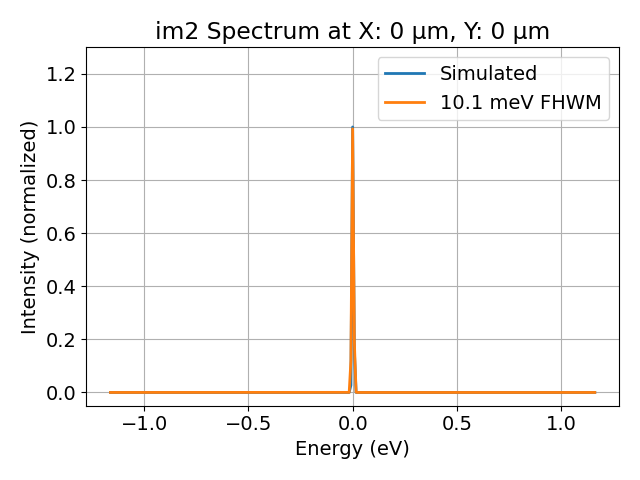

In [17]:
# pulse_test.plot_spectrum('im0')
# pulse_test.plot_spectrum('im1')
# pulse_test.imshow_energy_slice('im1')
# pulse_test.imshow_time_slice('im1')
# pulse_test.plot_spectrum('im2')

In [13]:
1/20

0.05

In [44]:
.8/20

0.04

In [36]:
(.06+.07)/20

0.006500000000000001

<IPython.core.display.Javascript object>


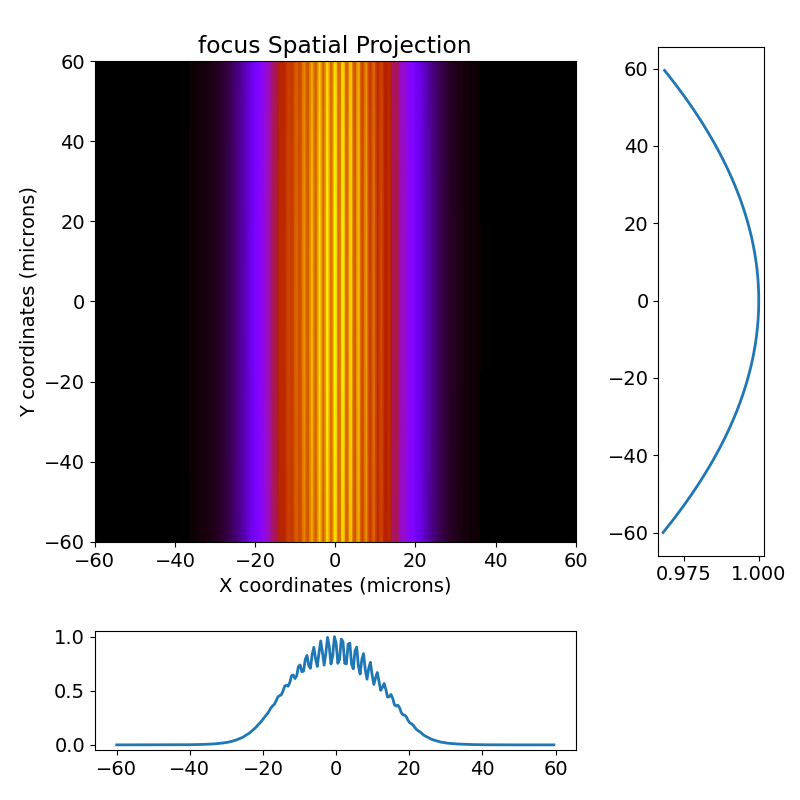

<IPython.core.display.Javascript object>


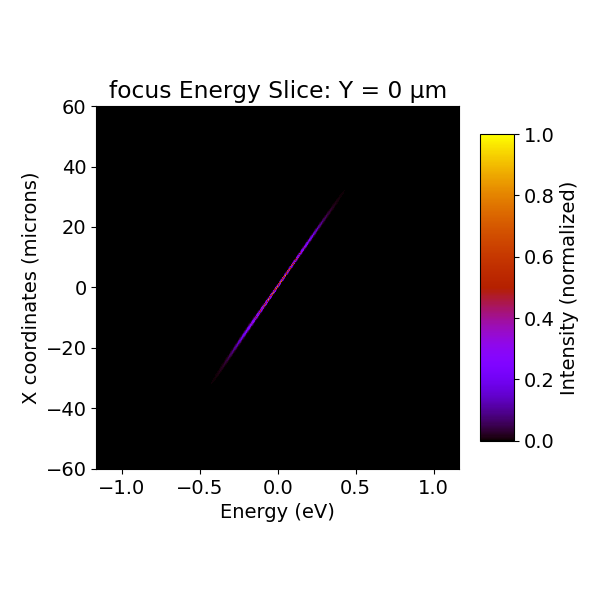

<IPython.core.display.Javascript object>


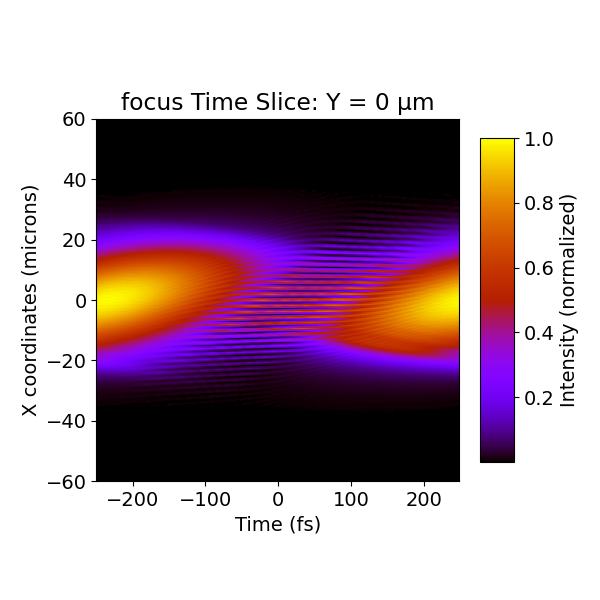

128
Fit failed. Using second moment for width.


<IPython.core.display.Javascript object>


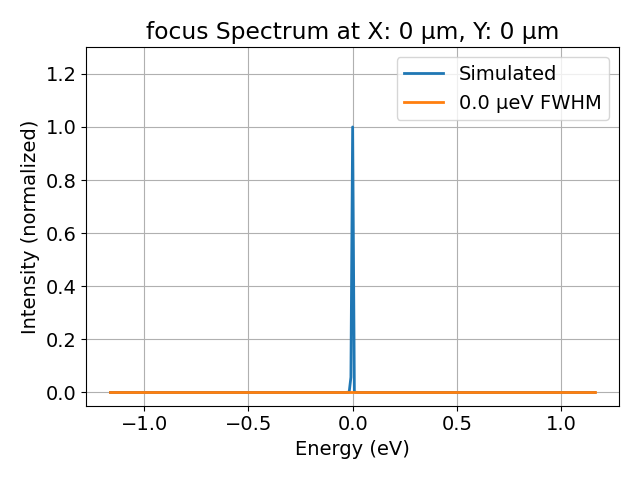

In [54]:
figure_path = '/Users/Matt/OneDrive - SLAC National Accelerator Laboratory/Projects/Hasan_mono/figures'

pulse_test.imshow_projection('focus')
pulse_test.imshow_energy_slice('focus')
# plt.savefig(figure_path+'/mirror_focus.png')
pulse_test.imshow_time_slice('focus')
plt.tight_layout()
pulse_test.plot_spectrum('focus', x_pos=0)

In [37]:
.4/(12.5-5)

0.05333333333333334